Create and plot a 1D linear function.

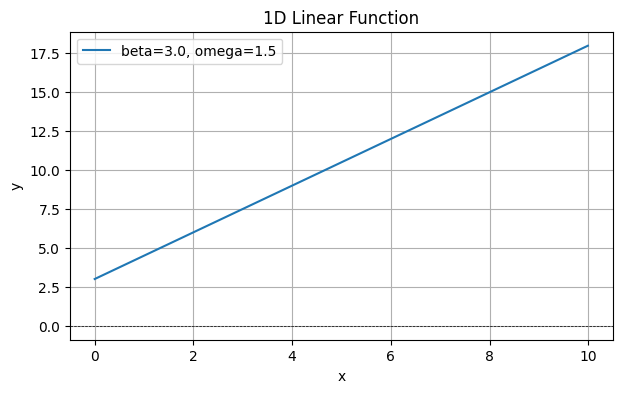

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a 1D linear function
def linear_function_1D(x, beta, omega):
    return beta + omega * x

# Create an array of x values
x = np.arange(0, 10, 0.01)

# Set parameters
beta = 3.0
omega = 1.5

# Compute y values
y = linear_function_1D(x, beta, omega)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(x, y, label=f"beta={beta}, omega={omega}")
# y label
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1D Linear Function')
plt.legend()
plt.grid(True)
plt.show()


## 2. What Are Hyperparameters?

In deep learning, we train models by adjusting internal weights and biases — these are called **parameters**.  
But there’s another kind of setting that **we must choose ourselves before training begins**:  
those are called **hyperparameters**.

### Definition

✅ **Hyperparameters** are configuration values **not learned** from data.  
We define them **before training** to control how the model behaves and learns.

These choices greatly affect:
- How fast the model learns 🐢⚡
- Whether it overfits or underfits the data 🎯
- How well it generalizes to new data 🌍

### Common Hyperparameters (Cheat Sheet)

| Hyperparameter             | What It Controls                                      | Typical Values      |
|----------------------------|--------------------------------------------------------|---------------------|
| **Learning Rate** (`lr`)  | How big a step we take to update weights               | 0.001 to 0.1        |
| **Number of Epochs**       | How many times we loop through the training set        | 100, 300, 1000+     |
| **Hidden Layer Size**      | How many neurons in each hidden layer                  | 16, 32, 64, ...     |
| **Number of Hidden Layers**| Depth of the network (1 layer? 2? more?)               | 1–3 (or more)       |
| **Batch Size**             | How many samples we use to compute gradients           | 16, 32, 64, 128     |
| **Activation Function**    | The non-linearity we apply (ReLU, Tanh, Sigmoid, etc.) | ReLU (common)       |
| **Optimizer**              | Algorithm for adjusting parameters                     | SGD, Adam, RMSprop  |

> ✅ These are like "knobs" we turn to tune our learning system.


### Why Do Hyperparameters Matter?

Even a great model architecture can perform poorly if the hyperparameters are poorly chosen.

- Too large a learning rate? ❌ Model never converges.
- Too few epochs? ❌ Model underfits.
- Too small hidden layer? ❌ Can’t capture patterns.
- Wrong activation? ❌ Poor gradient flow.

✅ Good hyperparameters make the **same model perform much better.**

Now that we know how important hyperparameters are,  
let’s build an actual MLP (Multi-Layer Perceptron) —  
first using PyTorch’s quick `nn.Sequential`, and then with a custom class using `nn.Module`.

---


## 5. Preparing the Concrete Dataset

### Overview: Why Data Preparation Matters

Before we train our neural network, we must carefully prepare the dataset. Good data preparation improves learning efficiency and model performance. This process includes:

- Loading the dataset
- Separating inputs and targets
- **Standardizing** the inputs (important!)
- Splitting into training and testing sets

We'll work with the **Concrete Compressive Strength** dataset — a real-world regression dataset.


### 🔹 What Is Standardization and Why Do We Need It?

In this dataset:
- Some features (e.g., cement) can be over 500
- Others (e.g., superplasticizer) are often less than 10

These differing **scales** can cause problems during training:
- Gradients may become unstable
- The optimizer may struggle to converge

To solve this, we apply **standardization**:

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

Where:
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation

This transforms each feature to have:
- Mean = 0
- Standard deviation = 1


### 🔹 Train/Test Split

To evaluate how well the model generalizes to **unseen data**, we split the data:

- **Training Set (80%)**: Model learns from this
- **Test Set (20%)**: Model is evaluated here

We shuffle before splitting to avoid bias.


### 🖥️ Code: Prepare the Concrete Dataset

### The Training Pipeline — Step-by-Step

Once we have our data and model ready, we move to the **core engine** of deep learning: training.

### What Does Training Involve?

Each epoch (a full pass over training data) performs the following:

1. **Forward Pass** – The model makes predictions for the training inputs.
2. **Loss Computation** – The model compares predictions to ground truth and calculates error.
3. **Backward Pass** – The gradients of the loss with respect to model parameters are computed.
4. **Optimization Step** – Parameters are updated to reduce the loss.
5. **Zeroing Gradients** – Gradients from the previous step are cleared (crucial in PyTorch).

This is repeated across **many epochs**, so the model gradually learns.

### 🧠 Conceptual Flow

```text
X_train 
   ↓
Forward Pass  →  Compute Predictions \hat{y}
   ↓
Loss Function →  Compare (\hat{y}, y_train)
   ↓
Backward Pass →  Compute Gradients
   ↓
Optimizer Step →  Update Weights
   ↓
Zero Gradients  →  Prepare for next epoch
```


### Code: Setup Loss and Optimizer

We’ll use:
- `nn.MSELoss()` — Mean Squared Error Loss
- `torch.optim.Adam()` — A popular adaptive optimizer

In [2]:
# Perceptron one-step prediction and optional training
import numpy as np

# Inputs (3 samples, 2 features each)
X_t = np.array([[1, 2], [-1, -2], [0, 1]])

# Fixed weights and bias
w = np.array([1.0, -1.0])
b = 0.5

# Compute linear outputs for the batch
z = X_t @ w + b  # shape (3,)

# Vectorized step function: Output 1 if z >= 0 else 0
y_pred = np.where(z >= 0, 1, 0)

print('z =', z)
print('y_pred =', y_pred)

# Keep a scalar step() for the training loop (if you use it elsewhere)
def step(z_scalar):
    return 1 if z_scalar >= 0 else 0

# Optional: run the existing training loop only if labels `y` exist in this scope
if 'y' in globals():
    lr = 0.1
    epochs = 5
    errors_per_epoch = []

    for epoch in range(epochs):
        total_errors = 0
        for xi, yi in zip(X_t, y):
            z_i = np.dot(w, xi) + b
            y_hat = step(z_i)

            # Perceptron update rule
            error = yi - y_hat
            if error != 0:
                w += lr * error * xi
                b += lr * error
                total_errors += 1

        errors_per_epoch.append(total_errors)
        print(f"Epoch {epoch+1}: errors = {total_errors}")
else:
    print("Labels 'y' not found — skipping training loop")

z = [-0.5  1.5 -0.5]
y_pred = [0 1 0]
Epoch 1: errors = 3
Epoch 2: errors = 3
Epoch 3: errors = 3
Epoch 4: errors = 3
Epoch 5: errors = 3


### **1. What is a Feedforward Neural Network?**

So far, we’ve learned about the **Perceptron** — a simple model that makes predictions based on a **single neuron**.

Now, we’re ready to explore something more powerful:

> **Feedforward Neural Networks (FNNs)**

A Feedforward Neural Network:
- **Stacks multiple neurons** into layers
- Allows intermediate **hidden layers**
- Uses **non-linear activation functions** to model complex patterns

### **Structure of a Basic FNN**

Let’s say our input is a vector $\mathbf{x} \in \mathbb{R}^2$  (e.g., two features from the heart dataset).

We define a simple **Feedforward Neural Network (FNN)** with:

- One **hidden layer** of 3 neurons  
- One **output neuron**


looks like this:

![an-introduction-to-training-theory-for-neural-networks_rk_aac_image2.webp](attachment:an-introduction-to-training-theory-for-neural-networks_rk_aac_image2.webp)


**What’s Happening Inside?**

Let’s walk through the **forward pass** step by step:

1. **Hidden layer linear transformation:**

$$
\mathbf{h}_{\text{lin}} = \mathbf{x} \cdot W_1 + \mathbf{b}_1
$$

2. **Apply activation (e.g., sigmoid or ReLU):**

$$
\mathbf{h} = \phi(\mathbf{h}_{\text{lin}})
$$

3. **Output layer:**

$$
\hat{y} = \mathbf{h} \cdot W_2 + b_2
$$


**Why Is This Powerful?**

- The hidden layer acts like a **feature transformer**.
- Non-linear activation functions (like ReLU or Sigmoid) allow the network to:
  - **Bend** the decision boundaries
  - **Capture non-linearly separable patterns**

---

In [3]:
# Manual forward pass and accuracy calculation
import numpy as np

# ReLU already defined earlier, but redefine safely if needed
def relu(z):
    return np.maximum(0, z)

try:
    # 1. Compute hidden linear pre-activation
    z1 = X_real @ W1_real + b1_real
    # 2. Apply ReLU activation
    h1 = relu(z1)
    # 3. Compute output logits
    logits = h1 @ W2_real + b2_real
    # Ensure logits is a 1-D array of shape (n_samples,)
    logits = np.squeeze(np.asarray(logits))
    # 4. Vectorized prediction: 1 if logit >= 0 else 0
    y_pred = (logits >= 0).astype(int)
    # 5. Compare predictions to ground truth and compute accuracy
    model_accuracy = float(np.mean(y_pred == y_real))
    print(f"Model accuracy: {model_accuracy*100:.2f}%")
except NameError as e:
    # Friendly message if required variables are missing
    print("Required variables not found in the notebook scope:", e)
    model_accuracy = None


Required variables not found in the notebook scope: name 'X_real' is not defined


### **1. Why Backpropagation?**

So far, we’ve seen how to **manually implement a forward pass** through a neural network — we compute the prediction $\hat{y}$ by passing the input $\mathbf{x}$ through weighted layers.

But to make the model learn, we need something more:  
We need to **adjust the weights** so that predictions get better over time.

That’s where **backpropagation** comes in.

**What is Backpropagation?**

> Backpropagation is the algorithm used to **compute the gradients** of a loss function with respect to all weights and biases in the network.

**Why Gradients?**

- Gradients tell us **how much to change each parameter** to reduce the loss.
- These are computed using the **chain rule** from calculus.

**Understanding Backpropagation Flow**

The diagram below illustrates the **forward and backward passes** in a feedforward neural network with:

- 1 hidden layer (ReLU activation)  
- 1 output layer (Sigmoid activation)  
- A scalar loss $L$

![backprop.png](attachment:backprop.png)

[source: https://pylessons.com/Deep-neural-networks-part3]

**Forward Pass (Purple Blocks)**

From left to right, the input $\mathbf{x}$ is transformed step by step:

1. **Hidden Layer (Linear)**  
   $$
   z^{[1]} = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1
   $$

2. **Activation (ReLU)**  
   $$
   a^{[1]} = \text{ReLU}(z^{[1]})
   $$

3. **Output Layer (Linear)**  
   $$
   z^{[2]} = \mathbf{W}_2 a^{[1]} + \mathbf{b}_2
   $$

4. **Activation (Sigmoid)**  
   $$
   \hat{y} = a^{[2]} = \sigma(z^{[2]})
   $$

Finally, we compute the **loss** $L(y, \hat{y})$ — often binary cross-entropy.


**Backward Pass (Brown Blocks)**

Backpropagation starts from the loss and flows backward using the **chain rule**.  
At each step, we compute gradients:

- $\frac{\partial L}{\partial a^{[2]}}$, then  
- $\frac{\partial L}{\partial z^{[2]}}$, then  
- $\frac{\partial L}{\partial a^{[1]}}$, and so on...

Each red box represents a **partial derivative**, and the arrows represent **chaining gradients** together using multiplication.


**Gradient of Loss with Respect to $\mathbf{W}_1$**

At the bottom, we summarize the final gradient needed to update the first layer’s weights:

$$
\frac{\partial L}{\partial \mathbf{W}_1} = 
\frac{\partial L}{\partial a^{[2]}} \cdot
\frac{\partial a^{[2]}}{\partial z^{[2]}} \cdot
\frac{\partial z^{[2]}}{\partial a^{[1]}} \cdot
\frac{\partial a^{[1]}}{\partial \mathbf{W}_1}
$$

Each component corresponds to one stage in the network,  
and their multiplication gives us the full gradient we need.

### 🧩 Key Learning Point

> **Backpropagation** breaks down a complex gradient into small, manageable steps — each one following the **chain rule**.

This is what allows us to **train deep neural networks efficiently**  
without computing complex symbolic derivatives from scratch.